# KATTLE BLUE BOOK

* This program aggregates USDA Feeder and Replacement Cattle Auction data to inform price-setting decisions
* Data is aggregated based on user selected criteria: State, Cattle Class, Grade, Frame and Weight group
* Historical cattle selling prices are shown through summary statistics and scatterplots
* Users can then enter their proposed selling price and will be informed if their proposed price is competitive or should be adjusted

#### Authors: Group 6
* Dannica Concepcion, Fernando Gomez Garcia, Megan Kolvenbach, Scott Levy, Michael Madison, Billy Dee Sorrells

#### Date: 12/01/2019

Welcome to KATTLE BLUE BOOK!

This program aggregates USDA Feeder and Replacement Cattle Auction data
to inform price-setting decisions.

Your summary stats will be saved to an output csv file.
If you run multiple searches the new results will be appended to the same file.

-------------------------------------------------------------------------------

Please enter your username (entries are not case sensitive):
dannicaconcepcion

Please enter your password (entries are case sensitive):
password1

Username and password match. Login successful.

Would you like to update your password?
n

Please enter a name for the output file:
testFile

Your summary stats will be saved to file testFile.csv

-------------------------------------------------------------------------------

Please enter the state you would like to see the cattle prices for:
Entries are not case sensitive. Enter the full state name, no abbreviations.
(Disclaimer: We currently only have data for Arkansas and Missouri at thi

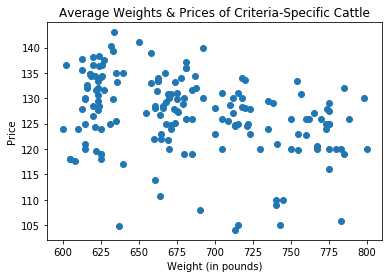

Scatterplot of cattle population by each criterion:


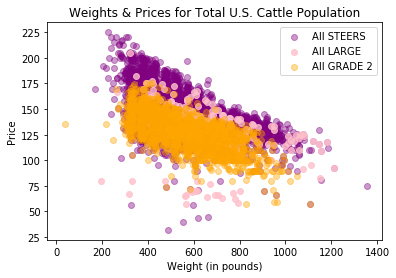

-------------------------------------------------------------------------------

Please enter your proposed price (per 100 pounds) for ARKANSAS STEERS of 
LARGE frame, grade 2 muscle, and weight between 600 and 800 pounds:
130


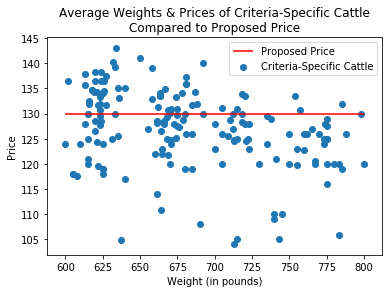


Feedback:
Your proposed price of $130.00 is between the 25th
and 75th percentile of historical selling prices.
Your price should be competitive.

Would you like to enter another price?
n

-------------------------------------------------------------------------------

Would you like to begin again and price another type of cattle?
n

-------------------------------------------------------------------------------

Would you like to save the 'testFile.csv' summary stats file?
y

Confirmation: The file 'testFile.csv' has been saved.

-------------------------------------------------------------------------------

Thank you for visiting KATTLE BLUE BOOK!
We hope to see you again soon.


In [4]:
### IMPORT MODULES
import pandas as pd # import pandas, set the alias as pd
import numpy as np # import numpy, set the alias as np
import os # import the os module
import matplotlib.pyplot as plt # import matplotlib, set the alias as plt
import sys # import sys
# show the plot wih inline mode
%matplotlib inline

### DEFINE FUNCTIONS
# define function that given the prompt: displays the prompt, gets user answer, and returns True or False
def continue_prompt(prompt):
    while True: # while loop 
        # set lists of accepted answers, one list for yes and one list for no
        yes = ["y", "yes","all right","alright","very well","of course","by all means","sure", 
               "certainly","absolutely","indeed","affirmative","in the affirmative","agreed", 
               "roger","aye","aye aye","yeah","yah","yep","yup","uh-huh","okay","ok","okey-dokey",
               "okey-doke","achcha","righto","righty-ho","surely","yea"]       
        no = ["no","n","no indeed","absolutely not","most certainly not","of course not","under no circumstances",
             "by no means","not at all","negative","never","not really","no thanks","nae","nope","nah",
             "not on your life","no way","no fear","not on your nelly","no siree","naw","nay"]
        make_bold(prompt) # prints prompt using make_bold function
        answer = str.lower(input()) # gets answer from user; converts input to all lowercase
        if answer in yes: # if input is within 'yes' accepted answers
            return True # returns True to be used in exception handling or loops
        elif answer in no: # if input is within 'no' accepted answers
            return False # returns False to be used in exception handling or loops
        else: # if input is not recognized as yes or no
            mark_invalid('Please enter Y or N.') # print error using mark_invalid function
        continue    
# define function to set upper limit
def define_upper_limit(x):
    upper = np.mean(x)+(np.std(x)*3) # calculates limit by adding 3 standard deviations to the mean
    return upper # returns upper limit
# define function to set lower limit
def define_lower_limit(y):
    lower = np.mean(y)-(np.std(y)*3) # calculates limit by substracting 3 standard deviations from the mean
    return lower # returns lower limit
# define function to bold given text
def make_bold(text):
    print('\033[01m'+text+'\033[0m')
# define function to highlight given text (to be used to echo user input)
def highlight_echo(text):
    print('\033[0;30;43m'+text+'\033[0m')
# define function to format invalid responses
def mark_invalid(statement): # given an feedback statement, prints error in red and prints feedback statement in black
    print('\033[1;31m','That entry was invalid.','\n','\033[0m',statement)
# make a function to handle missing csv files
def missing_csv(fileName, phrase, exit): # brings in 3 variables
    if not os.path.exists(fileName+'.csv'): # uses variable  1 to set the file name and makes it a CSV
        if exit == True: # if variable 3 is True program will exit instead of crashing with an error
            sys.exit(phrase) # takes  variable 2 and prints it as a final message out
        else:
            print(phrase) # takes variable two to let the user know file was not found but will not impact the run
    else:
        return False # errors not found program returns False to is there a missing CSV

### SET DICTIONARIES, CONSTANTS, AND VARIABLES
# set state and abbreviations dictionary
state_dict = {"ALABAMA":"AL","ALASKA":"AK","ARIZONA":"AZ","ARKANSAS":"AR","CALIFORNIA":"CA",
          "COLORADO":"CO","CONNECTICUT":"CT","DELAWARE":"DE","FLORIDA":"FL","GEORGIA":"GA",
          "HAWAII":"HI","IDAHO":"ID","ILLINOIS":"IL","INDIANA":"IN","IOWA":"IA","KANSAS":"KS",
          "KENTUCKY":"KY","LOUISIANA":"LA","MAINE":"ME","MARYLAND":"MD","MASSACHUSETTS":"MA","MICHIGAN":"MI",
          "MINNESOTA":"MN","MISSISSIPPI":"MS","MISSOURI":"MO","MONTANA":"MT","NEBRASKA":"NE","NEVADA":"NV",
          "NEW HAMPSHIRE":"NH","NEW JERSEY":"NJ","NEW MEXICO":"NM","NEW YORK":"NY","NORTH CAROLINA":"NC",
          "NORTH DAKOTA":"ND","OHIO":"OH","OKLAHOMA":"OK","OREGON":"OR","PENNSYLVANIA":"PA","RHODE ISLAND":"RI",
          "SOUTH CAROLINA":"SC","SOUTH DAKOTA":"SD","TENNESSEE":"TN","TEXAS":"TX","UTAH":"UT","VERMONT":"VT",
          "VIRGINIA":"VA","WASHINGTON":"WA","WEST VIRGINIA":"WV","WISCONSIN":"WI","WYOMING":"WY"} 
# set constant to reset loops
RESET = '!&!'
# set logo font 
KBB = '\033[1;255;44mKATTLE BLUE BOOK\033[0m'
# set output delimiter to separate sections
DELIMITER = '-------------------------------------------------------------------------------'
# set formatter to display prices to 2 decimal places
priceFormatter = '{:,.2f}'
# create an empty dictionary
loginData= {}

### CATTLE DATA HANDLING
# checks for missing CSV file if missing gives notification and exits program without error
if missing_csv('final_feeder_data', ' Sorry, looks like the file \"final_feeder_data.csv" is missing. Please place the file in your current working directory and rerun the program.', True) == False:
    cattleData = pd.read_csv('final_feeder_data.csv'.upper()) # read raw data from CSV files
# checks for missing CSV file if missing gives notification and exits program without error    
if missing_csv('state-abbrevs', ' Sorry, looks like the file \"state-abbrevs.csv" is missing. Please place the file in your current working directory and rerun the program.', True) == False:
    abbrevs = pd.read_csv('state-abbrevs.csv'.upper()) # read raw data from CSV files                              
# merge abbrevs with cattleData by state abbreviations (adds the full state name)
data = pd.merge(cattleData,abbrevs, left_on='market_location_state',right_on='abbreviation')
# drop 'abbreviation' duplicate column that was created due to merge
# clean the raw imported data by dropping columns that will not be utilized in calculations or further filtering
data = data.drop(['abbreviation','office_name','office_code','office_state','report_begin_date','published_date',       
                'market_location_name', 'office_city', 'market_type', 'market_type_category', 'slug_id','slug_name',            
                'report_title', 'final_ind','report_end_date', 'report_date', 'quality_grade_name', 'lot_desc',             
                'freight'],  axis = 'columns')
# replace null values with zero
data = data.fillna(0)
# make various columns upper case for purposes of matching with user inputs
data['state'] = data['state'].str.upper()
data['class'] = data['class'].str.upper()
data['frame'] = data['frame'].str.upper()
# set the index to the category column
data = data.set_index('category')
# create the dataframe
df = pd.DataFrame(data)
weightTemp = df['avg_weight']
priceTemp = df['avg_price']
# remove outliers by only using data within the upper and lower limits
df = df[(df['avg_weight'] < define_upper_limit(weightTemp)) & ( df['avg_weight']> define_lower_limit(weightTemp)) & 
        (df['avg_price']< define_upper_limit(priceTemp)) & ( df['avg_price'] > define_lower_limit(priceTemp))]
# rename certain columns for display purposes
df.rename(columns = {'avg_price':'Average Price','avg_price_min':'Minimum Price',
                     'avg_price_max':'Maximum Price'}, inplace = True)

### PROGRAM INTRODUCTION; print welcome to user and inform them of csv creation
print('Welcome to '+KBB+'!\n') 
print('This program aggregates USDA Feeder and Replacement Cattle Auction data')
print('to inform price-setting decisions.\n')
print('Your summary stats will be saved to an output csv file.')
print('If you run multiple searches the new results will be appended to the same file.\n')
print(DELIMITER) # to separate sections

### USER LOGIN
# checks for a csv file first if found will give a notification
if missing_csv('login', ' You don\'t have a login file, one will be created', False) == False:
    loginData = pd.read_csv('login.csv', index_col=0, squeeze=True).to_dict() # read raw data from CSV file, set index to first column, and make dictionary
make_bold('\nPlease enter your username (entries are not case sensitive):') # get username from user
loginUsername = str(input())
loginUsername = loginUsername.lower()
# validate username
if loginUsername in loginData: # if username is in data
    password = False # to start loop
    while password == False: # while no password
        make_bold('\nPlease enter your password (entries are case sensitive):') # get password from user
        loginPassword = str(input())
        if loginPassword == loginData[loginUsername]: # if password matches username value
            highlight_echo('\nUsername and password match. Login successful.') # confirm login successful
            noFilesForYou = False # allow user to save files
            password = True # set password to true to exit loop
            changePassword = continue_prompt('\nWould you like to update your password?') # prompt to UPDATE password 
            if changePassword == True: # if user wants to update their password then begin update
                make_bold('\nPlease enter your password (entries are case sensitive):')
                loginPasswordUpdated = str(input())
                loginData[loginUsername] = loginPasswordUpdated # add new key value pair to dictionary
                pd.DataFrame.from_dict(data=loginData, orient='index').to_csv('login.csv', header=['password'])
                highlight_echo('\nAccount has been updated.') # confirm login successful
        else: # if password does not match username value
            mark_invalid('Username and password do not match.') # inform the user of invalid entry
else: # if username is not in data, ask user if they would like to register
    makeUsername = continue_prompt('\nYour username is not registered. Would you like to register?')
    if makeUsername == True: # if user wants to register
        make_bold('\nPlease enter your password (entries are case sensitive):') # get password from user
        loginPassword = str(input())
        loginData[loginUsername.lower()] = loginPassword # add new key value pair to dictionary
        pd.DataFrame.from_dict(data=loginData, orient='index').to_csv('login.csv', header=['password'])
        highlight_echo('\nAccount has been created.') # confirm login successful
        noFilesForYou = False # allow to save files
    elif makeUsername == False: # if user does not want to register
        highlight_echo('\nContinue as guest.')
        print('Without an account, you will not be able to save files.') # inform the user of inability to save files
        noFilesForYou = True # do not allow to save files
# if user can save files, get output file name
if noFilesForYou == False: 
    validFile = False # to start loop
    while validFile == False: # while loop to get valid file name
        make_bold('\nPlease enter a name for the output file:') # get output file name from user
        fileNameOut = input()
        # to validate input
        # if not alphanumeric or the file already exists
        if not (fileNameOut.isalnum()) or os.path.exists(fileNameOut+'.csv'):
            # inform user of invalid input and have them try again
            mark_invalid('The file name must be alphanumeric and cannot already exist.')
            validFile = False # to repeat loop
        else: # if valid file name
            # confirm the file name the user has chosen
            print('\nYour summary stats will be saved to file ',end='')
            highlight_echo(str(fileNameOut)+'.csv')
            validFile = True # to exit loop

### MAIN PROGRAM LOOP
while True: # while loop to repeat program
    print('\n'+DELIMITER) # to separate sections
    # while loop to get criteria from user, repeats if empty dataset is created 
    countzero = -1 # to start loop
    while countzero == -1:
        ###WHILE LOOPS FOR USER INPUT
        # while loop to get and validate STATE user input
        state = RESET # to start loop
        while state == RESET:
            # get state from user and inform them of requirements
            make_bold('\nPlease enter the state you would like to see the cattle prices for:')
            print('Entries are not case sensitive. Enter the full state name, no abbreviations.')
            print('(Disclaimer: We currently only have data for Arkansas and Missouri at this time.)')
            state = input()
            # to validate input
            if state.upper() in df['state'].values: # if input within states that information is available for
                print('\nThe state you have chosen is: ',end='') # confirm the state user has chosen
                highlight_echo(state.upper())
            elif state.upper() in state_dict: # if input is a valid state, but KBB does not have data for 
                mark_invalid('We currently only have data for the states Arkansas and Missouri.') # inform user of invalid entry
                state = RESET # reset the variable to start the loop over
            else: # when input is not recognized as a U.S. state
                mark_invalid('That state name is not recognized.') # inform user of invalid entry
                state = RESET # reset the variable to start the loop over                          
       
        # while loop to get and validate CLASS user input
        cattleClass = RESET # to start loop
        while cattleClass == RESET:
            # get class from user and inform them of requirements
            make_bold('\nPlease enter the class of cattle you would like to see the prices for:')
            print('Entries are not case sensitive.')
            print('(Class choices are: Bulls, Cows, Heifers, or Steers.)')
            cattleClass = input()
            # to validate input
            if cattleClass.upper() in df['class'].values: # if input is a valid class
                print('\nThe class you have chosen is: ', end='') # confirm the class user has chosen
                highlight_echo(cattleClass.upper())
            else: # if input is not a valid class
                mark_invalid('That class is not recognized.') # inform the user of invalid entry
                cattleClass = RESET # reset the variable to start the loop over    
        
        # while loop to get and validate FRAME user input
        frame = RESET # to start loop
        while frame == RESET:
            # get frame from user and inform them of requirements
            make_bold('\nPlease enter the frame of cattle you would like to see the prices for:')
            print('Entries are not case sensitive.')
            print('(Frame choices are: Small, Medium, or Large.)')
            frame = input()
            # to validate input
            if frame.upper() in df['frame'].values: # if input is a valid frame
                print('\nThe frame you have chosen is: ',end='') # confirm the frame user has chosen
                highlight_echo(frame.upper())
            else: # if input is not a valid frame
                mark_invalid('That frame is not recognized.') # inform the user of invalid entry
                frame = RESET # reset the variable to start the loop over
        
        # while loop to get and validate GRADE user input
        grade = 0 # to start loop
        while grade == 0:
            # get grade from user and inform them of requirements
            make_bold('\nPlease enter the grade of cattle you would like to see the prices for:')
            print('Choose a number between 1 and 4.')
            grade = input()
            # to validate input
            if grade.isnumeric(): # if input is numeric
                if int(grade) in [1, 2, 3, 4]: # if input is 1, 2, 3, or 4
                    # confirm the grade user has chosen
                    print('\nThe grade you have chosen is: ', end='') # confirm the grade user has chosen
                    highlight_echo(grade)
                else: # if input is numeric but not 1, 2, 3, or 4
                    mark_invalid('That grade is not recognized. ') # inform the user of invalid entry
                    grade = 0 # reset the variable to start the loop over
            else: # if input is not numeric
                mark_invalid('That grade is not recognized.') # inform the user of invalid entry
                grade = 0 # reset the variable to start the loop over
        
        # while loop to get and validate WEIGHT user input
        weight = 0 # to start loop
        while weight == 0:
            # get weight from user and inform them of requirements
            make_bold('\nPlease enter the weight (in pounds) of cattle you would like to see the prices for:')
            print('Choose a whole number weight between 300 and 1,300 pounds.')
            print('The program will provide average prices for cattle weighing 100 pounds below to')
            print('100 pounds above your specified weight.')
            weight = input()
            # to validate input
            if weight.isnumeric(): # if weight is numeric
                if int(weight) in np.arange(300, 1301): # if weight in range 300-1301, not including 1301
                    print('\nThe weight (in pounds) you have chosen is: ', end='') # confirm the weight user has chosen
                    highlight_echo(weight)
                else: # if weight not in range
                    mark_invalid('That weight is outside the valid range.') # inform the user of invalid entry
                    weight = 0 # reset the variable to start the loop over
            else: # if weight is not numeric
                mark_invalid('Please only enter a positive, whole number.') # inform the user of invalid entry
                weight = 0 # reset the variable to start the loop over
                
        ### CREATE DATAFRAME
        # create mask to filter data by user chosen criteria
        mask = (df['state']==state.upper()) & (df['class']==cattleClass.upper()) & \
            (frame.upper() in df['frame'].any()) & \
            (df['avg_weight'].between(int(weight)-100, int(weight)+100)) & \
            (df['muscle_grade']== grade)
        # create a dataframe from the mask
        maskDf = pd.DataFrame(mask)
        # define the format to be used for summary data display using priceFormatter
        pd.options.display.float_format = priceFormatter.format
        # set variable to show specific columns
        cattleResults = df[mask].loc[:, 'Minimum Price':'Average Price']
        # create dataframe from results
        resultsDf = pd.DataFrame(cattleResults)
        
        ### CHECK IF DATA AVAILABLE FOR USER CRITERIA
        # find whether all elements are zero 
        countzero = np.count_nonzero(resultsDf)
        if countzero != 0: # if dataset is not empty, show summary stats
            print('\n'+DELIMITER+'\n') # to separate sections
            make_bold(('Historical price statistics for ').center(50))
            make_bold((str(int(countzero/3))+' '+state.upper()+' '+cattleClass.upper()+' of '+frame.upper()+' frame, grade '+grade+' muscle,').center(50))
            make_bold(('and weight between '+str(int(weight)-100)+' and '+str(int(weight)+100)+' pounds:\n').center(50))
            print(cattleResults.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])    
            # create dataframe of the stats
            summaryStats = pd.DataFrame(cattleResults.describe())
            if noFilesForYou == False: # check to see if user can save files or if they are guest
                summaryStats.to_csv(fileNameOut+'.csv', mode='a') # export to csv file
        else: # if dataset is empty, inform user and have them enter new criteria
            make_bold('\nSorry, there is currently no cattle data that meet all of your criteria:')
            print('State:  '+state.upper())
            print('Class:  '+cattleClass.upper())
            print('Frame:  '+frame.upper())
            print('Grade:  '+grade)
            print('Weight: '+weight+' +/- 100 pounds')
            make_bold('\nPlease enter new criteria.')
            countzero = -1   # reset to -1 to start loop over
            print('\n'+DELIMITER) # to separate sections
            
    ### SCATTERPLOT FOR CATTLE MATCHING USER CRITERIA
    make_bold('\nScatterplot of cattle matching all of your criteria:') 
    # create dataframe for 1st scatterplot
    cattleChart = df[mask].loc[:, 'avg_weight':'Average Price']
    # read the weight data into an array, this will be our x axis 
    avgWeight = cattleChart['avg_weight']
    # read the price data into an array, this will be our y axis
    avgPrice = cattleChart['Average Price']
    plt.title("Average Weights & Prices of Criteria-Specific Cattle") # set the title
    plt.xlabel("Weight (in pounds)") # set the label of x axis
    plt.ylabel("Price") # set the label of y axis
    # create and display the scatter plot
    plt.scatter(avgWeight, avgPrice) # create and display the scatter plot
    plt.show()  
    
    ### SCATTERPLOT FOR CATTLE BY EACH CRITERION
    make_bold('Scatterplot of cattle population by each criterion:')
    # create 1st dataset for 2nd scatterplot
    classChart = df.loc[:, 'class':'Average Price']
    # get price data for class population 
    classWeight = classChart[classChart['class']==cattleClass.upper()]['avg_weight']
    classPrice = classChart[classChart['class']==cattleClass.upper()]['Average Price']
    # plot 1st dataset 
    plt.scatter(classWeight, classPrice, label = 'All '+cattleClass.upper(), color='purple', alpha=.4)
    
    # create 2nd dataset for 2nd scatterplot
    frameChart = df.loc[:, 'class':'Average Price']
    # get price data for frame population
    frameWeight = frameChart[frameChart['frame']==frame.upper()]['avg_weight']
    framePrice = frameChart[frameChart['frame']==frame.upper()]['Average Price']
    # plot 2nd dataset
    plt.scatter(frameWeight, framePrice, label = 'All '+frame.upper(), color='pink', alpha=0.8)
    
    # create 3rd dataset for 2nd scatterplot
    gradeChart = df.loc[:, 'class':'Average Price']
    # get price data for grade population
    gradeWeight = gradeChart[gradeChart['muscle_grade']==grade.upper()]['avg_weight']
    gradePrice = gradeChart[gradeChart['muscle_grade']==grade.upper()]['Average Price']
    # plot 3rd dataset
    plt.scatter(gradeWeight, gradePrice, label = "All GRADE "+grade.upper(), color='orange', alpha=.4)
    
    # set style of 2nd scatterplot
    plt.title("Weights & Prices for Total U.S. Cattle Population") # set the title
    plt.xlabel("Weight (in pounds)") # set the label of x axis
    plt.ylabel("Price") # set the label of y axis
    plt.legend(loc='upper right') # show the legend on the plot
    plt.show() # display the scatter plot
    print(DELIMITER) # to separate sections
    
    # while loop for PROPOSED PRICE comparison
    while True:
        while True: # while loop to handle errors
            try:
                # get proposed price from user and echo cattle criteria
                make_bold('\nPlease enter your proposed price (per 100 pounds) for '+state.upper()+' '+cattleClass.upper()+' of ')
                make_bold(frame.upper()+' frame, grade '+grade+' muscle, and weight between '+str(int(weight)-100)+' and '+str(int(weight)+100)+' pounds:')
                proposedPrice = float(input())
                inverse = abs(proposedPrice)
                Check = 1/(inverse+proposedPrice)
                break
                # to check for valid entry        
            except (ValueError, ZeroDivisionError): # if error occurs 
                mark_invalid('Please enter a positive number.') # inform the user of invalid entry       
        
        ### SCATTERPLOT FOR COMPARING PROPOSED PRICE
        cattleChart = df[mask].loc[:, 'avg_weight':'Average Price'] # create dataset
        avgWeight = cattleChart['avg_weight'] # read the weight data into an array, this will be our x axis 
        avgPrice = cattleChart['Average Price'] # read the price data into an array, this will be our y axis
        # to create a line showing the proposed price
        plt.hlines(y=float(proposedPrice), xmin=float(weight)-100, xmax=float(weight)+100, color="red", label='Proposed Price')
        plt.title("Average Weights & Prices of Criteria-Specific Cattle"+"\n"+'Compared to Proposed Price') # set the title
        plt.xlabel("Weight (in pounds)") # set the label of x axis
        plt.ylabel("Price") # set the label of y axis 
        plt.scatter(avgWeight, avgPrice, label='Criteria-Specific Cattle') # create the scatter plot
        plt.legend(loc='upper right') # show the legend on the plot
        plt.show() # display the scatter plot
    
        # if valid entry, compare proposed price and print corresponding feedback
        make_bold('\nFeedback:')
        if float(proposedPrice) > summaryStats.loc['75%', 'Average Price']: # if price is greater than avg 75th percentile
            print('Your proposed price of $'+str(priceFormatter.format(proposedPrice))+' is greater than the'+'\n'+'75th percentile of historical selling prices.')
            highlight_echo('Consider decreasing your price.')
        elif float(proposedPrice) < summaryStats.loc['25%', 'Average Price']: # if price is below avg 25th percentile
            print('Your proposed price of $'+str(priceFormatter.format(proposedPrice))+' is less than the'+'\n'+'25th percentile of historical selling prices.')
            highlight_echo('Consider increasing your price.')
        else: # else; if user is between 25th and 75th percentile
            print('Your proposed price of $'+str(priceFormatter.format(proposedPrice))+' is between the 25th'+'\n'+'and 75th percentile of historical selling prices.')
            highlight_echo('Your price should be competitive.')        
                        
        # ask user if they want to enter another price
        anotherPrice = continue_prompt('\nWould you like to enter another price?')
        if anotherPrice == False: # if user does not want to enter another price
            break # exits loop
    
    print('\n'+DELIMITER+'\n') # to separate sections
    # if user is finished entering prices, ask if they want to start over with new cattle criteria
    beginAgain = continue_prompt('Would you like to begin again and price another type of cattle?')
    if beginAgain == False: # if user does not want to enter another price
        break # exits loop
        
### SAVE OR DELETE CSV FILE
if noFilesForYou == False: # only occurs if user has a username and password
    print('\n'+DELIMITER+'\n') # to separate sections
    # if user is finished pricing cattle, ask if user wants to save the csv file
    save = continue_prompt('Would you like to save the \''+str(fileNameOut)+'.csv\' summary stats file?')
    if save == True: # if user wants to save the file
        print('\nConfirmation: The file \''+str(fileNameOut)+'.csv\' has been ',end='') # inform user file has been saved
        highlight_echo('saved.')
    else: # if user wants to delete the file
        os.remove(fileNameOut+'.csv') # delete the csv file
        print('\nConfirmation: The file \''+str(fileNameOut)+'.csv\' has been ',end='') # inform user of deletion
        highlight_echo('removed.')
        
### END PROGRAM WITH THANK YOU TO USER
print('\n'+DELIMITER+'\n')
print('Thank you for visiting '+KBB+'!')
print('We hope to see you again soon.')